# Assignment 1

Due by 11:59pm Sept. 18, 2023

## Theory Questions (Question 1: 9 points, Question 2: 4 points, Question 3: 12 points)

***

1.Suppose `I` is a 5$\times$5 image, `K` is a 3$\times$3 convolving kernel. Compute the convolution of the image `I` with `K`, with the given settings.

`I`:
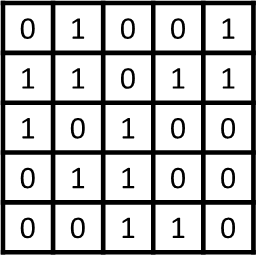

`K`:
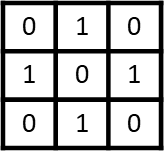

a) Zero padding, stride $=1$.

b) Zero padding, stride $=2$.

c) No padding, stride $=1$.

**Answer:**

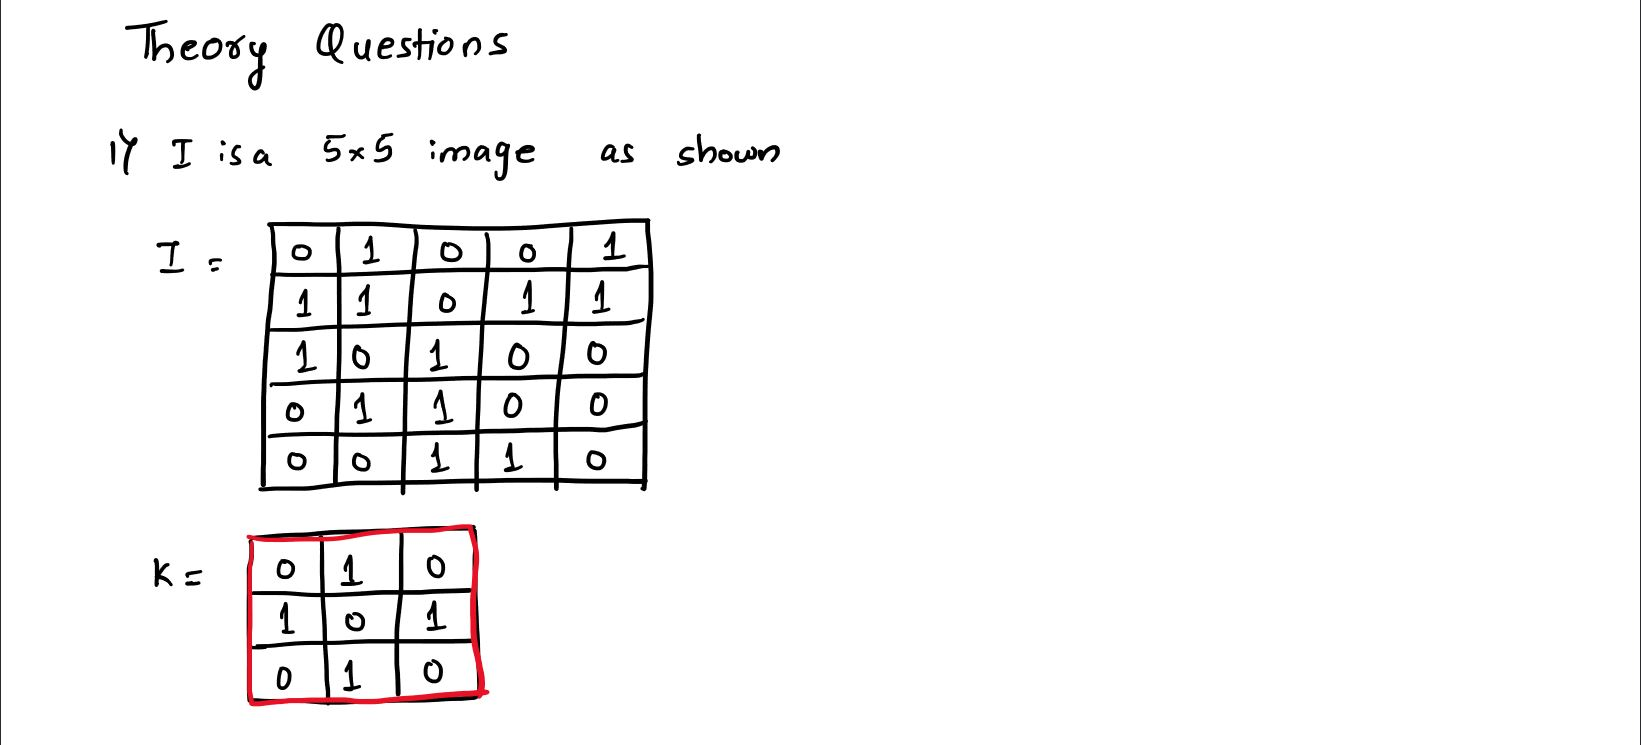

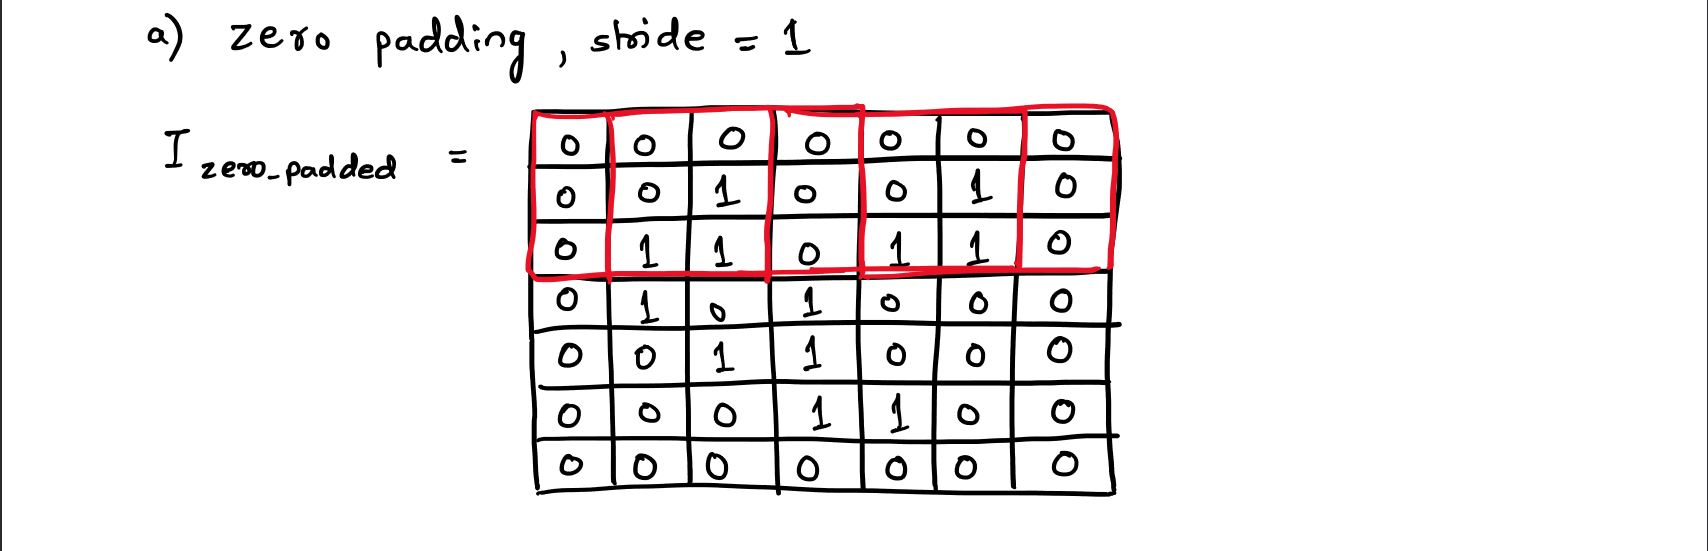

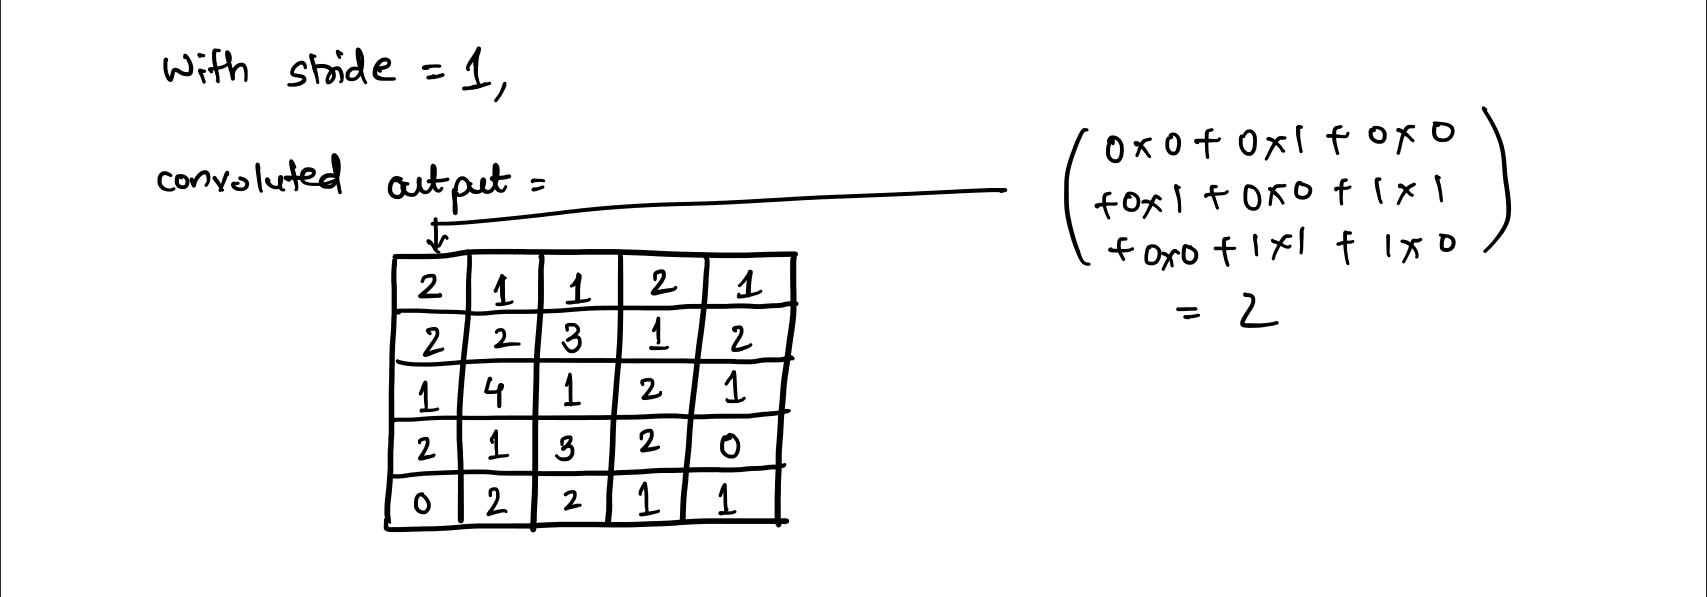

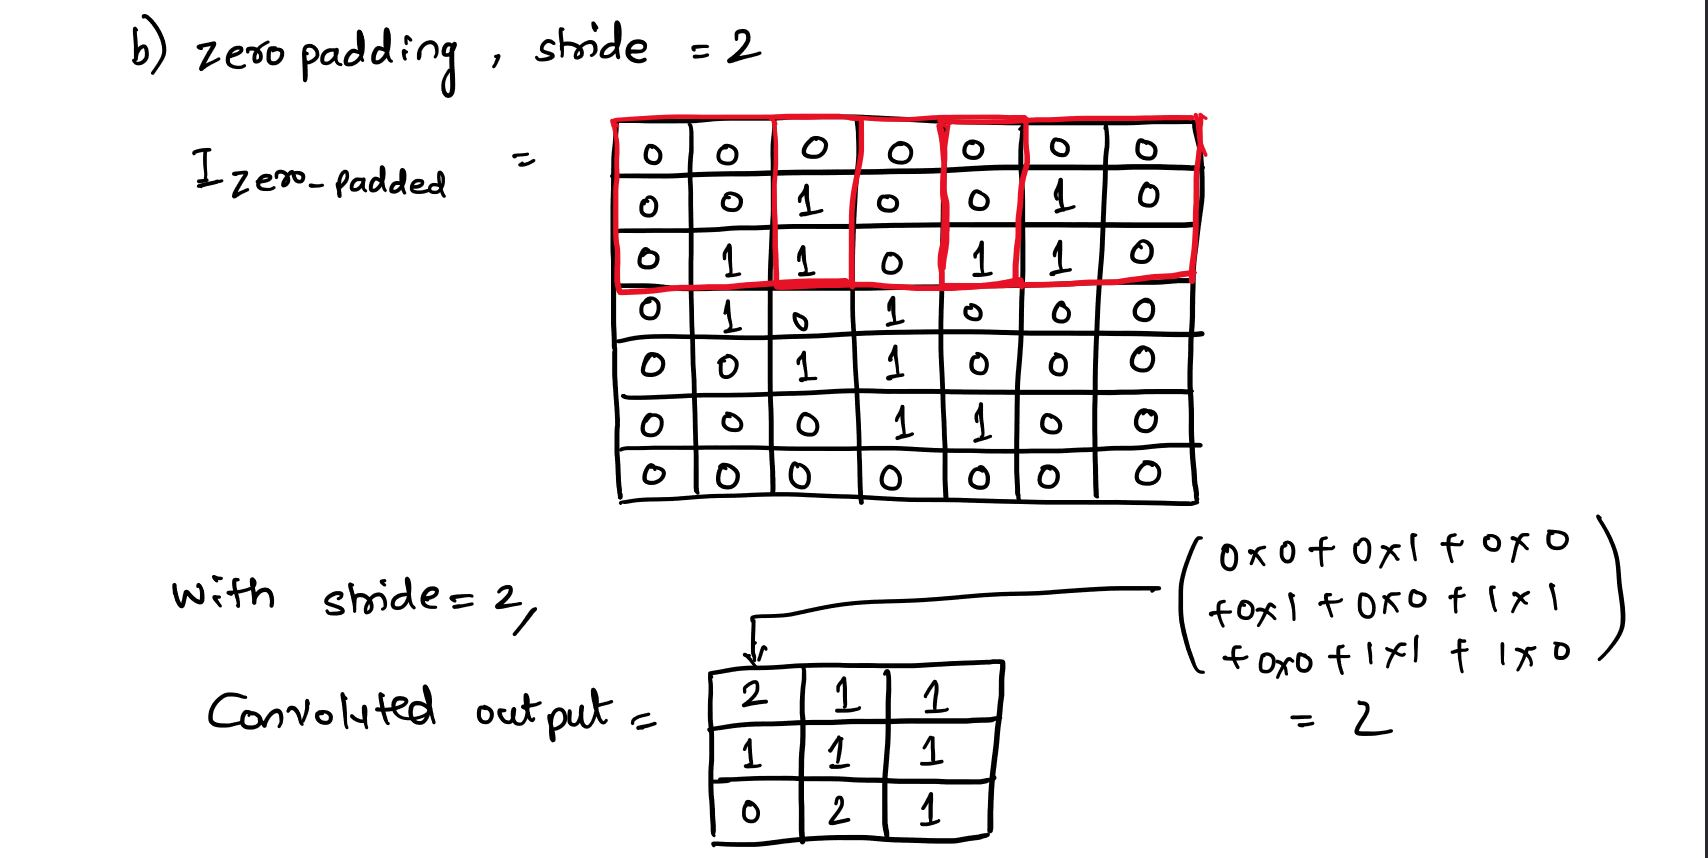

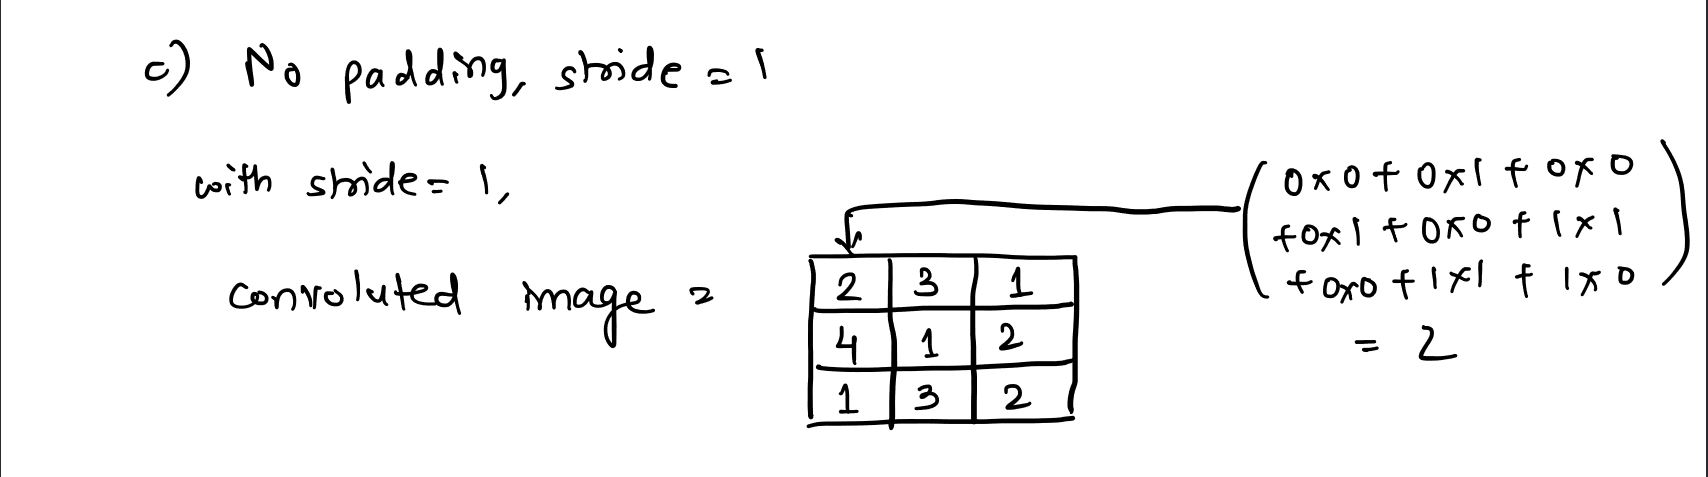

2.Let `I` be the input. Write the output using average pooling with $2\times2$ kernel, stride $=2$.

`I`:
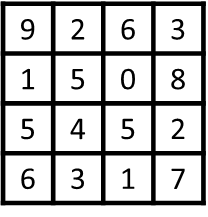

**Answer:**

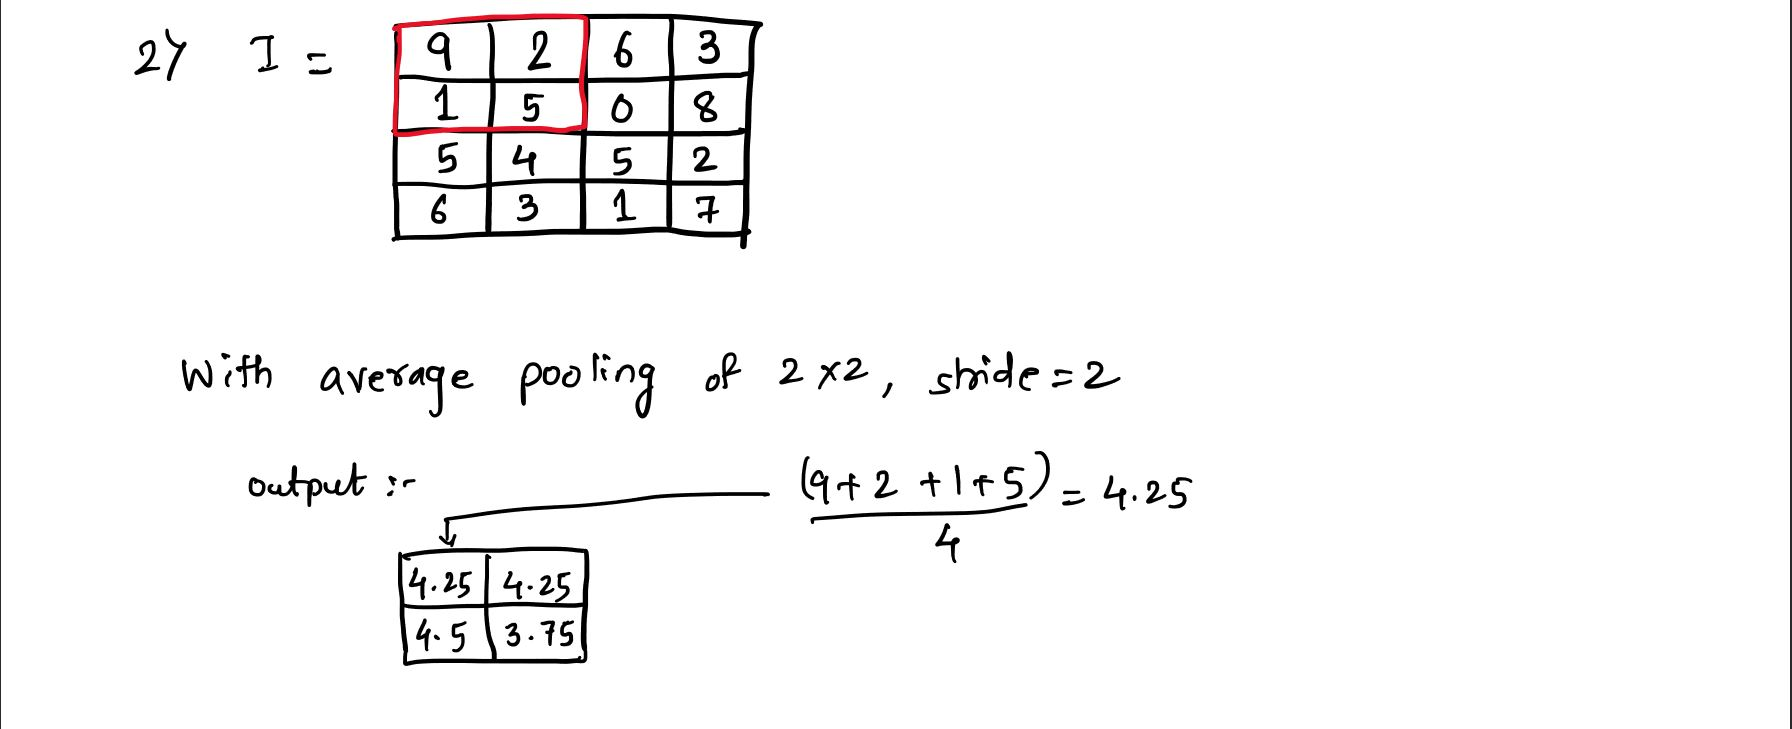

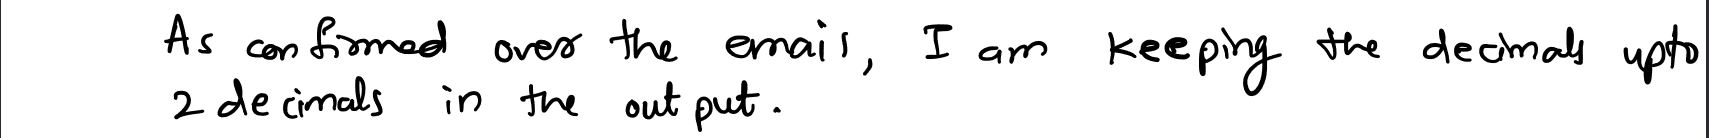

3.`I` is a $5\times5$ RGB image. `K` is a $3\times3$ convolving kernel with all its weights equal to $-1$. `b` is the bias equal to $1$.

The `R` channel is given as
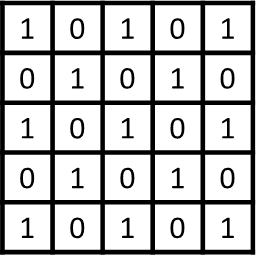

The `G` channel is given as
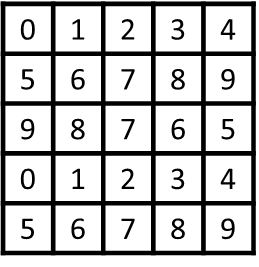

The `B` channel is given as
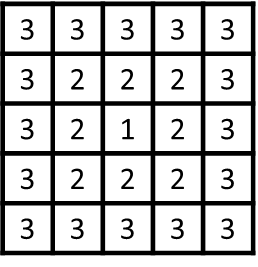

Please calculate the convolution of `I` with `K` and `b`, where stride $=1$, and no padding is applied.

**Answer:**

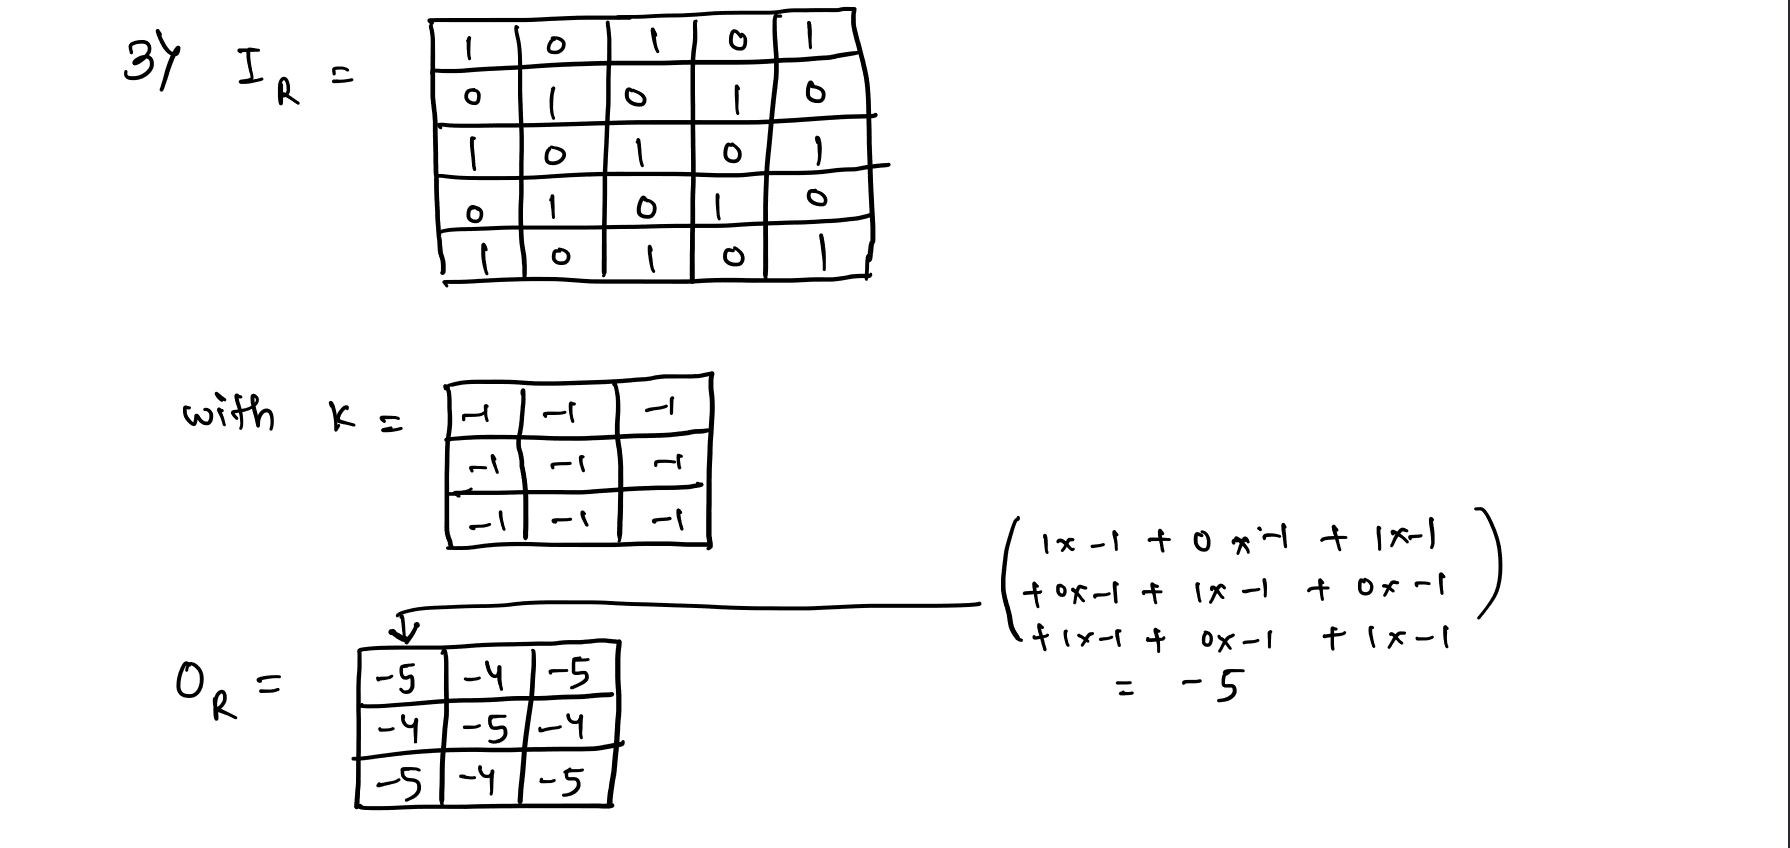

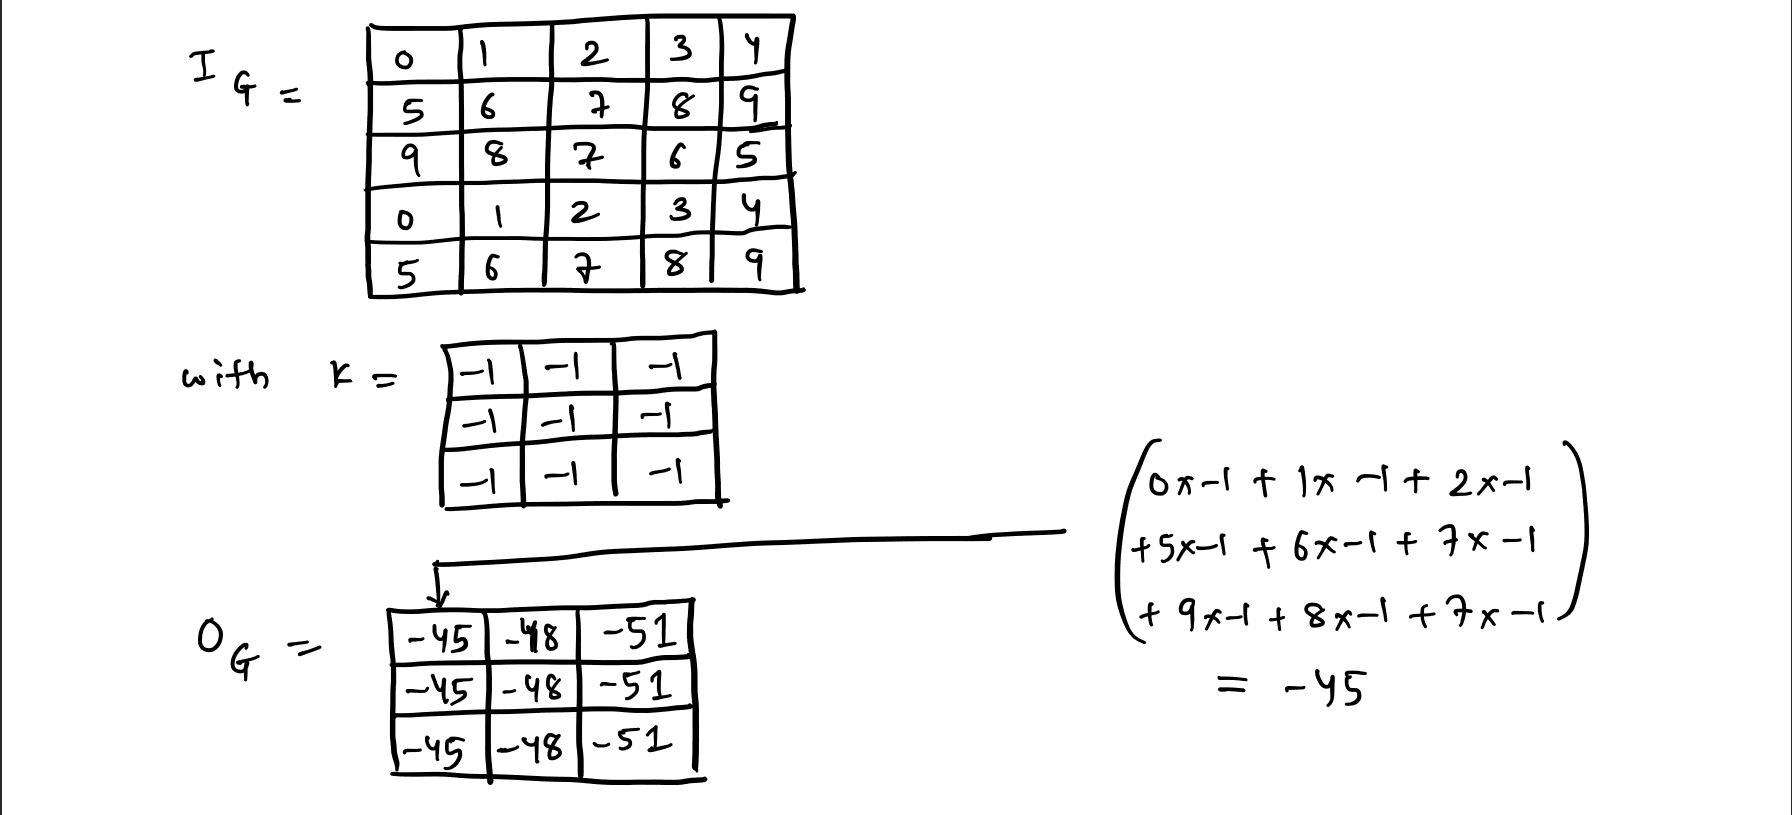

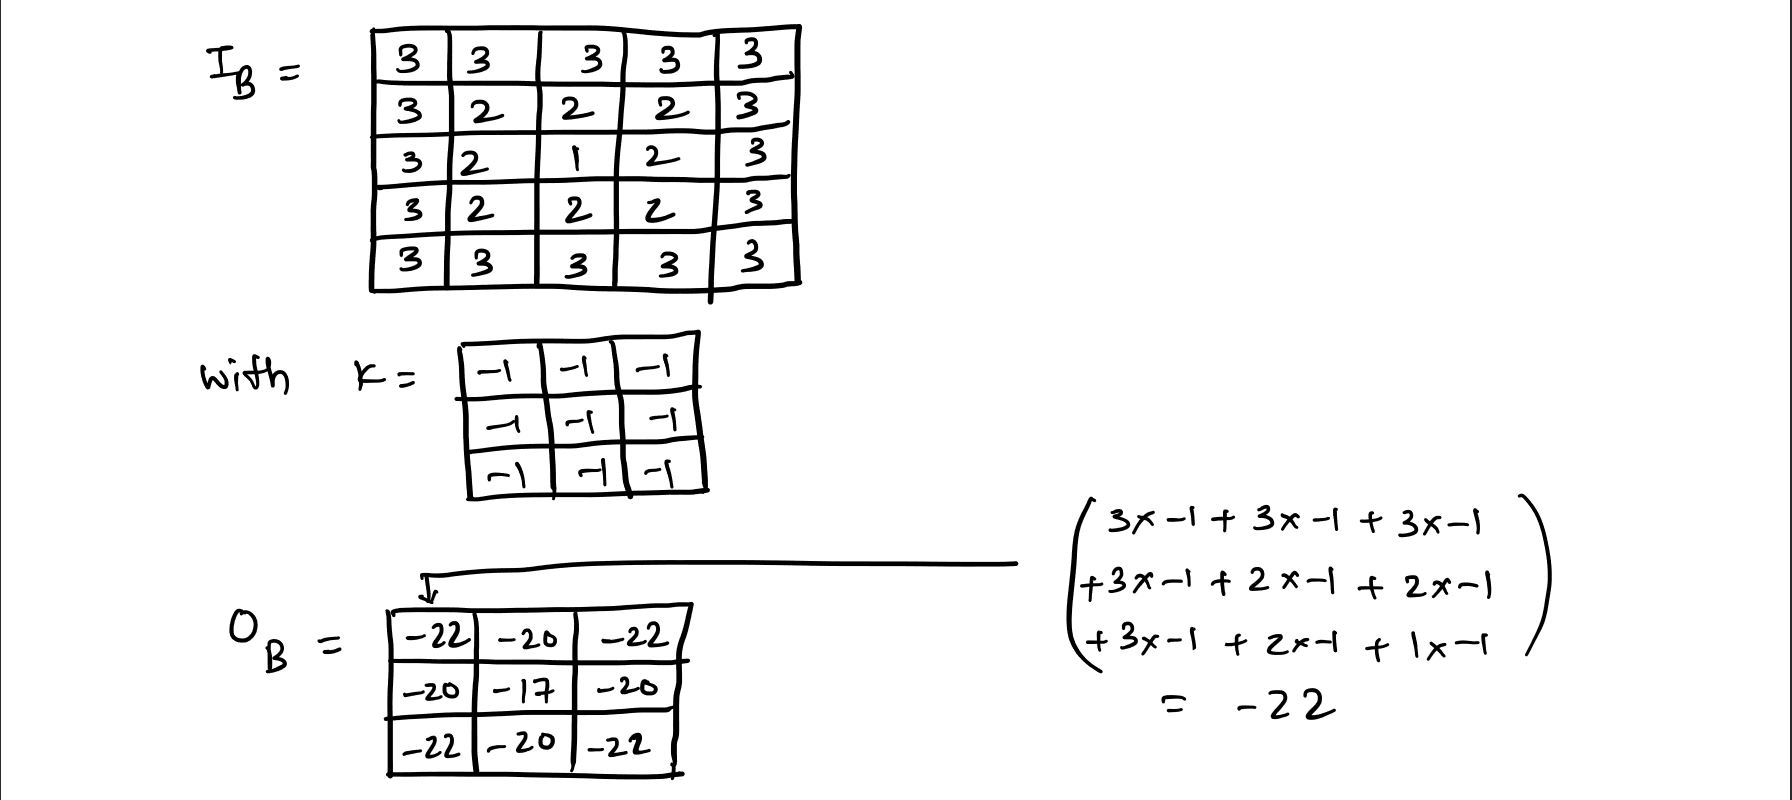

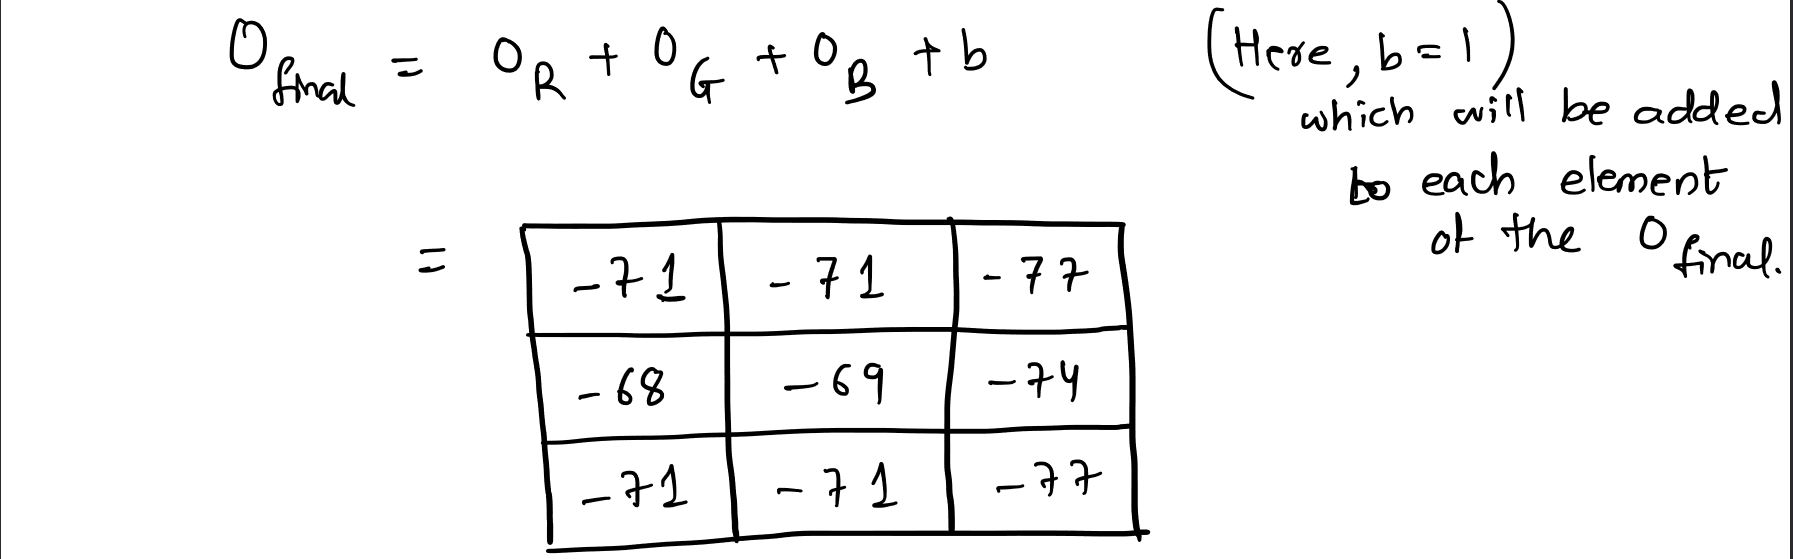

## Programming Questions (Question 4: 45 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

**Note:** Initial code has been provided to import the necessary packages and load the dataset. Now that we have introduced PyTorch programming, you should use it to solve the programming problems in this assignment.

In [1]:
#Required library imports.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#Data Downloading and Preprocessing.

#Preprocessing: Data transformation pipeline.
#Converting the data into Pytorch Tensor and normalize it by subtracting 0.5 and dividing by 0.5.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#Loading the MNIST dataset into the root folder and download if not present.
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
#Specifying how many rows will be the training data and validation data.
no_of_train_rows = len(training_data)
no_of_validation_rows = int(0.1 * no_of_train_rows)  #i.e. we will use 10% of the data for validation.
no_of_train_rows = no_of_train_rows - no_of_validation_rows  #i.e. we will use 90% of the data for training.

#Batch size for loading the data during training the model.
batch_size = 64

In [4]:
#Using random_split to split the training data into training and validation sets.
training_data, validation_data = torch.utils.data.random_split(training_data, [no_of_train_rows, no_of_validation_rows])

#Creating data loaders for training, validation, and testing in batches.
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size)
test_loader = DataLoader(testing_data, batch_size=batch_size)

In [5]:
#Defining a CNN model with 2 convolutional layers, 1 max pooling layer, and 2 fully connected layers.
#Using the nn.Module from PyTorch.
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        '''
        This function apploed the convolution layers, pooling layer, and flatten the output,  passing it
        through the fully connected layers.
        '''
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
#Initializing the model, loss function, and optimizer.
model = CNN()

#As we know, cross entropy loss is used extensively for classification tasks.
criterion = nn.CrossEntropyLoss()

#Using the Adam optimizer for optimization and trying the learning rate of 0.001.
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
#Training parameters and instantiating the lists of outputs.
no_of_epochs = 10
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

In [8]:
#Training the model for 10 epochs.
for epoch in range(no_of_epochs):
    model.train()
    running_loss_training = 0.0
    correct_predictions_train = 0
    total_samples_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss_training += loss.item()
        _, predicted_labels = torch.max(outputs, 1)
        total_samples_train += labels.size(0)
        correct_predictions_train += (predicted_labels == labels).sum().item()

    training_loss = running_loss_training / len(train_loader)
    training_accuracy = 100 * correct_predictions_train / total_samples_train

    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)

    #Validating the model.
    model.eval()
    running_loss_validation = 0.0
    correct_predictions_validation = 0
    total_samples_validation = 0

    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss_validation += loss.item()
            _, predicted_labels = torch.max(outputs, 1)
            total_samples_validation += labels.size(0)
            correct_predictions_validation += (predicted_labels == labels).sum().item()

        validation_loss = running_loss_validation / len(validation_loader)
        validation_accuracy = 100 * correct_predictions_validation / total_samples_validation

        validation_losses.append(validation_loss)
        validation_accuracies.append(validation_accuracy)

    print(f"Epoch [{epoch + 1}/{no_of_epochs}] - Training Loss: {training_loss:.4f}, Training Accuracy: {training_accuracy:.2f}%, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.2f}%")

Epoch [1/10] - Training Loss: 0.1771, Training Accuracy: 94.50%, Validation Loss: 0.0795, Validation Accuracy: 97.52%
Epoch [2/10] - Training Loss: 0.0473, Training Accuracy: 98.54%, Validation Loss: 0.0509, Validation Accuracy: 98.50%
Epoch [3/10] - Training Loss: 0.0336, Training Accuracy: 98.91%, Validation Loss: 0.0505, Validation Accuracy: 98.68%
Epoch [4/10] - Training Loss: 0.0255, Training Accuracy: 99.17%, Validation Loss: 0.0460, Validation Accuracy: 98.62%
Epoch [5/10] - Training Loss: 0.0203, Training Accuracy: 99.34%, Validation Loss: 0.0443, Validation Accuracy: 98.80%
Epoch [6/10] - Training Loss: 0.0163, Training Accuracy: 99.44%, Validation Loss: 0.0392, Validation Accuracy: 99.02%
Epoch [7/10] - Training Loss: 0.0133, Training Accuracy: 99.55%, Validation Loss: 0.0421, Validation Accuracy: 99.03%
Epoch [8/10] - Training Loss: 0.0094, Training Accuracy: 99.68%, Validation Loss: 0.0508, Validation Accuracy: 98.98%
Epoch [9/10] - Training Loss: 0.0093, Training Accuracy:

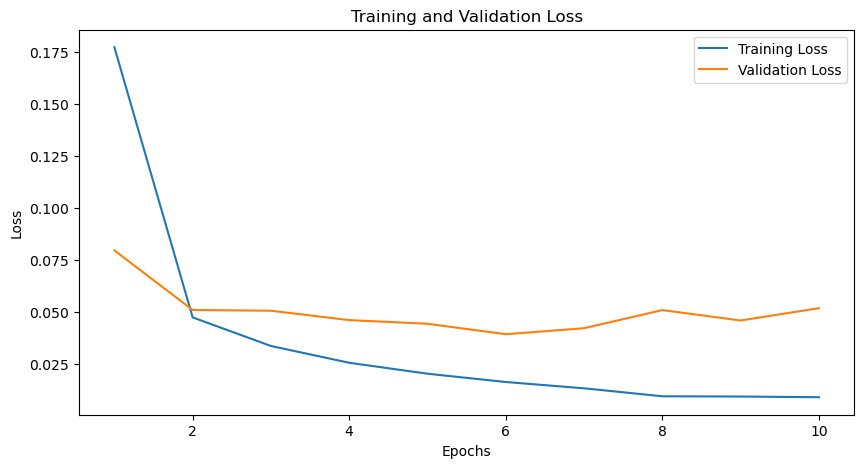

In [9]:
#Plotting the training and validation losses vs Epochs.
plt.figure(figsize=(10, 5))
plt.plot(range(1, no_of_epochs + 1), training_losses, label="Training Loss")
plt.plot(range(1, no_of_epochs + 1), validation_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

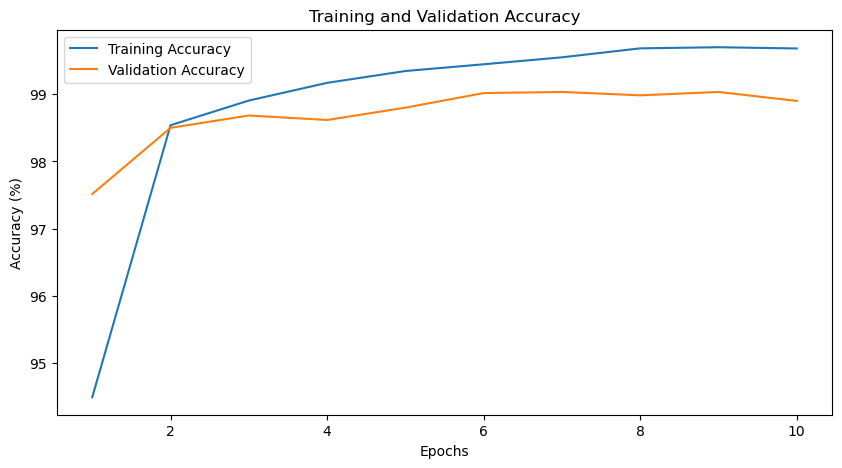

In [10]:
#Plotting the training and validation accuracies vs Epochs.
plt.figure(figsize=(10, 5))
plt.plot(range(1, no_of_epochs + 1), training_accuracies, label="Training Accuracy")
plt.plot(range(1, no_of_epochs + 1), validation_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

In [11]:
#Testing the model we trained and validated.
model.eval()
correct_predictions_test = 0
total_samples_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted_labels = torch.max(outputs, 1)
        total_samples_test += labels.size(0)
        correct_predictions_test += (predicted_labels == labels).sum().item()

test_accuracy = 100 * correct_predictions_test / total_samples_test
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Testing Accuracy: 99.01%


5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



In [12]:
#Required library imports.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import random_split

In [13]:
#Data Downloading and Preprocessing.

#Preprocessing: Image transformation pipeline.
#Converting the data into Pytorch Tensor and normalize it by subtracting 0.5 and dividing by 0.5.
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Loading the CIFAR-10 dataset into the root folder and download if not present.
training_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
#Specifying the training and validation data sizes.
no_of_validation_rows = int(0.1 * len(training_data))
no_of_training_rows = len(training_data) - no_of_validation_rows
train_data, validation_data = random_split(training_data, [no_of_training_rows, no_of_validation_rows])

In [15]:
#Creating data loaders for training, validation, and testing using 2 CPU processes.
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=128, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False, num_workers=2)

In [16]:
#Defining a CNN model with 2 convolutional layers, 1 max pooling layer, and 2 fully connected layers.
#Using the nn.Module from PyTorch.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(128 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        '''
        This function applied the convolution layers, pooling layer, and flatten the output,  passing it
        through the fully connected layers.
        '''
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
#Initializing the neural network, loss function, and optimizer.
Neural_net = Net()

#As we know, cross entropy loss is used extensively for classification tasks.
criterion = nn.CrossEntropyLoss()

#Using the Stochastic Gradient Descent optimizer for optimization and trying the learning rate of 0.01 and momentum of 0.9.
optimizer = optim.SGD(Neural_net.parameters(), lr=0.01, momentum=0.9)

In [18]:
#Training the network for 10 epochs.
for epoch in range(10):
    running_loss_train = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = Neural_net(inputs)
        training_loss = criterion(outputs, labels)
        training_loss.backward()
        optimizer.step()
        running_loss_train += training_loss.item()
    print(f"Epoch {epoch+1}, Training Loss: {running_loss_train / len(train_loader)}")

Epoch 1, Training Loss: 1.811256087639115
Epoch 2, Training Loss: 1.451577794145454
Epoch 3, Training Loss: 1.257690616968003
Epoch 4, Training Loss: 1.1310758705843578
Epoch 5, Training Loss: 1.0495984953912822
Epoch 6, Training Loss: 0.9777741863984953
Epoch 7, Training Loss: 0.9106178703633222
Epoch 8, Training Loss: 0.8557972931726412
Epoch 9, Training Loss: 0.8102160277353092
Epoch 10, Training Loss: 0.7745727740905501


In [19]:
#Testing the network after Training.
correct_predictions_test = 0
total_samples_test = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = Neural_net(inputs)
        _, predicted_labels = torch.max(outputs.data, 1)
        total_samples_test += labels.size(0)
        correct_predictions_test += (predicted_labels == labels).sum().item()

testing_accuracy = 100 * correct_predictions_test / total_samples_test
print(f"Testing Accuracy: {testing_accuracy}%")

Testing Accuracy: 71.66%


### As TAs confirmed that the 80% is considered as a good accuracy. Trying to hypertune the neural network to increase accuracy.

In [20]:
#Hypertuning the parameters.
#Changing the architecture and adding more layers.
#In this tuned CNN model adding more convolution layers, batch normalization layers.
#Using the nn.Module from PyTorch.
class Tuned_Net(nn.Module):
    def __init__(self):
        super(Tuned_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        '''
        This function applied the convolution layers, pooling layer, and flatten the output,  passing it
        through the fully connected layers.
        '''
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [21]:
#Initializing the neural network, loss function, and optimizer.
Neural_net = Tuned_Net()

#As we know, cross entropy loss is used extensively for classification tasks.
criterion = nn.CrossEntropyLoss()

#Using the Adam optimizer for optimization and trying the learning rate of 0.001.
optimizer = optim.Adam(Neural_net.parameters(), lr=0.001)  #Tried different optimizer and learning rate from before.

In [25]:
#Instantiating the lists of outputs.
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

#Training the network for 30 epochs (Increased the number of epochs from before).
for epoch in range(30):
    Neural_net.train()
    running_loss_train = 0.0
    correct_predictions_train = 0
    total_samples_train = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = Neural_net(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        
        running_loss_train += train_loss.item()
        _, predicted_labels = torch.max(outputs, 1)
        total_samples_train += labels.size(0)
        correct_predictions_train += (predicted_labels == labels).sum().item()
        
    training_loss = running_loss_train / len(train_loader)
    training_accuracy = 100 * correct_predictions_train / total_samples_train
    
    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)
    
    #Validating the neural net after training.
    Neural_net.eval()
    validation_loss = 0.0
    running_loss_validation = 0.0
    correct_predictions_validation = 0
    total_samples_validation = 0
    
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data
            outputs = Neural_net(inputs)
            running_loss_validation += criterion(outputs, labels).item()
            _, predicted_labels = torch.max(outputs.data, 1)
            total_samples_validation += labels.size(0)
            correct_predictions_validation += (predicted_labels == labels).sum().item()
            
    validation_loss = running_loss_validation / len(validation_loader)
    validation_accuracy = 100 * correct_predictions_validation / total_samples_validation
    
    validation_losses.append(validation_loss)
    validation_accuracies.append(validation_accuracy)
        
    print(f"Epoch {epoch+1}, Training Loss: {training_loss:.4f}, Training Accuracy: {training_accuracy:.2f}%, Validation loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.2f}%")

Epoch 1, Training Loss: 1.0434, Training Accuracy: 63.06%, Validation loss: 0.9022, Validation Accuracy: 68.38%
Epoch 2, Training Loss: 0.9912, Training Accuracy: 64.83%, Validation loss: 0.9086, Validation Accuracy: 68.28%
Epoch 3, Training Loss: 0.9246, Training Accuracy: 67.66%, Validation loss: 0.8242, Validation Accuracy: 71.28%
Epoch 4, Training Loss: 0.8796, Training Accuracy: 69.20%, Validation loss: 0.8263, Validation Accuracy: 72.02%
Epoch 5, Training Loss: 0.8539, Training Accuracy: 70.24%, Validation loss: 0.7937, Validation Accuracy: 72.38%
Epoch 6, Training Loss: 0.8114, Training Accuracy: 71.85%, Validation loss: 0.7578, Validation Accuracy: 74.82%
Epoch 7, Training Loss: 0.7805, Training Accuracy: 73.11%, Validation loss: 0.7254, Validation Accuracy: 74.98%
Epoch 8, Training Loss: 0.7509, Training Accuracy: 74.14%, Validation loss: 0.7506, Validation Accuracy: 74.80%
Epoch 9, Training Loss: 0.7223, Training Accuracy: 75.18%, Validation loss: 0.6787, Validation Accuracy:

In [26]:
#Testing the network after Training.
correct_predictions_test = 0
total_samples_test = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = Neural_net(inputs)
        _, predicted_labels = torch.max(outputs.data, 1)
        total_samples_test += labels.size(0)
        correct_predictions_test += (predicted_labels == labels).sum().item()

testing_accuracy = 100 * correct_predictions_test / total_samples_test
print(f"Testing Accuracy: {testing_accuracy}%")

Testing Accuracy: 84.16%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8dc1382940>
Traceback (most recent call last):
  File "/Users/MrMess/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/MrMess/opt/anaconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


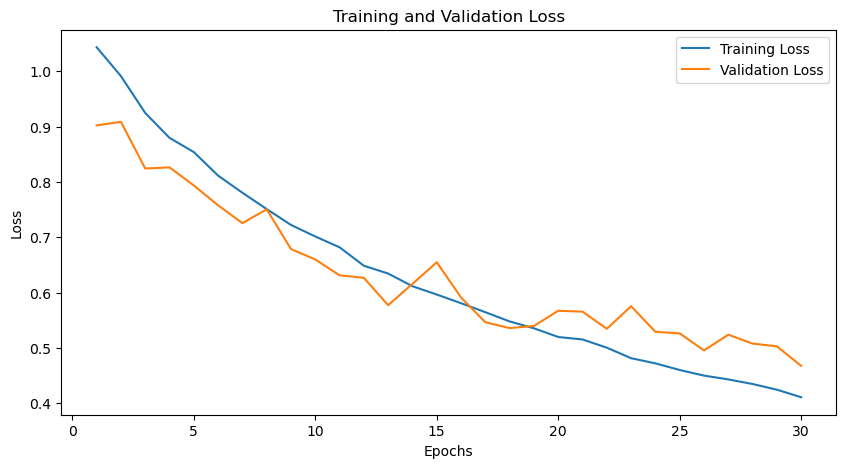

In [27]:
#Plotting the training and validation losses vs Epochs.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), training_losses, label="Training Loss")
plt.plot(range(1, 31), validation_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

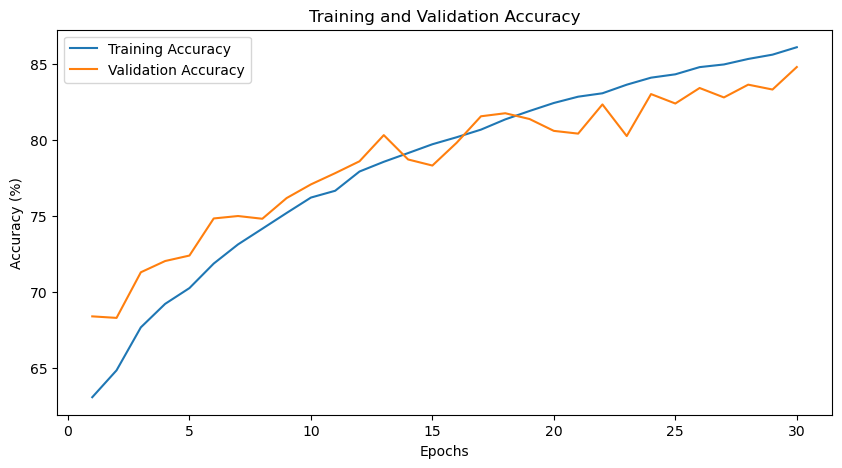

In [29]:
#Plotting the training and validation accuracies vs Epochs.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), training_accuracies, label="Training Accuracy")
plt.plot(range(1, 31), validation_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()